In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from itertools import combinations

In [58]:
# load data
data = pd.read_csv('../Data/Dataset3.csv' , delimiter=',', quotechar='"')
data.head(20)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,"24,87","82,84","295,61",Clayey,rice,DAP
1,"28,69","96,65","178,96",laterite,Coconut,Good NPK
2,"20,27","81,64","270,44",silty clay,rice,MOP
3,"25,07","95,02","192,9",sandy,Coconut,Urea
4,"25,04","95,9","174,8",coastal,Coconut,Urea
5,"20,82","84,13","230,22",clay loam,rice,Urea
6,"25,95","93,41","172,05",alluvial,Coconut,Urea
7,"26,49","80,16","242,86",Clayey,rice,DAP
8,"25,01","95,59","165,81",coastal,Coconut,Urea
9,"21,87","80,19","224,56",silty clay,rice,Urea


# Equal_frequency_discretize

In [59]:
def equal_frequency_discretize(column_name , q=0):
    n= len(data[column_name])
    # define the number of quantiles with a formula
    if q == 0:
        q = math.ceil(1+10/3*math.log10(n))
    print(f"Number of quantiles: {q}")
    data.sort_values(by=[column_name], inplace=True)
    data.reset_index(drop=True, inplace=True)
    bin_size = len(data) // q
    discretized_column = [round(i // bin_size )for i in range(len(data))]
    data[f'{column_name}_E_F'] = discretized_column
    return data

equal_frequency_discretize("Temperature" , 10)
data.head(10)

Number of quantiles: 10


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F
0,"20,05","80,35","208,58",silty clay,rice,Urea,0
1,"20,05","80,35","208,58",silty clay,rice,MOP,0
2,"20,08","83,29","263,64",Clayey,rice,MOP,0
3,"20,08","83,29","263,64",Clayey,rice,Urea,0
4,"20,13","81,6","262,72",Clayey,rice,MOP,0
5,"20,27","81,64","270,44",silty clay,rice,MOP,0
6,"20,28","82,12","191,95",sandy,Coconut,Urea,0
7,"20,28","82,12","191,95",sandy,Coconut,DAP,0
8,"20,28","82,89","241,97",Clayey,rice,MOP,0
9,"20,41","82,21","245,15",Clayey,rice,MOP,0


In [60]:
# 'Humidity'
equal_frequency_discretize("Humidity")
data.head()

Number of quantiles: 10


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F
0,"26,53","80,12","218,92",Clayey,rice,DAP,6,0
1,"26,53","80,12","218,92",Clayey,rice,Urea,6,0
2,"25,6","80,15","200,83",silty clay,rice,MOP,4,0
3,"26,49","80,16","242,86",Clayey,rice,DAP,6,0
4,"21,87","80,19","224,56",silty clay,rice,Urea,1,0


In [61]:
equal_frequency_discretize("Rainfall")
data.head()

Number of quantiles: 10


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F,Rainfall_E_F
0,"27,75","95,95","131,09",laterite,Coconut,Urea,8,8,0
1,"29,52","92,56","131,21",coastal,Coconut,Good NPK,9,6,0
2,"25,76","94,66","131,25",alluvial,Coconut,DAP,5,7,0
3,"25,76","94,66","131,25",alluvial,Coconut,Urea,5,7,0
4,"26,14","96,39","131,34",coastal,Coconut,MOP,5,8,0


In [62]:
import warnings
warnings.filterwarnings('ignore') # to ignore warnings

# Define a list of columns to process
columns_to_process = ['Temperature', 'Humidity', 'Rainfall']

for i in range(len(data)): # for each row
    for column in columns_to_process: # for each column
        if type(data[column][i]) == str: # if the value is a string
            if ',' in data[column][i]: # if comma is used as decimal separator
                data[column][i] = data[column][i].replace(',', '.') # replace comma with dot
            data[column][i] = float(data[column][i]) # convert to float
        else:
            data[column][i] = float(data[column][i]) # convert to float
data.head()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F,Rainfall_E_F
0,27.75,95.95,131.09,laterite,Coconut,Urea,8,8,0
1,29.52,92.56,131.21,coastal,Coconut,Good NPK,9,6,0
2,25.76,94.66,131.25,alluvial,Coconut,DAP,5,7,0
3,25.76,94.66,131.25,alluvial,Coconut,Urea,5,7,0
4,26.14,96.39,131.34,coastal,Coconut,MOP,5,8,0


# Equal_width_discretize

In [63]:
def equal_width_discretize( column_name):
    n= len(data[column_name]) # number of rows
    num_bins =  1+10/3*math.log10(n) # number of bins
    min_value = data[column_name].min() # min value
    max_value = data[column_name].max()  # max value
    bin_width = (max_value - min_value) / num_bins  # bin width
    print(f"Number of bins: {num_bins}")
    discretized_column = [round( (x - min_value) / bin_width ) for x in data[column_name]] # discretized column
    data[f'{column_name}_E_W'] = discretized_column # add discretized column to the dataframe
    return data

equal_width_discretize( "Temperature") # discretize Temperature
equal_width_discretize( "Humidity") # discretize Humidity
equal_width_discretize( "Rainfall") # discretize Rainfall
data.head(12) # show the first 5 rows

Number of bins: 9.232740053260544
Number of bins: 9.232740053260544
Number of bins: 9.232740053260544


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_E_F,Humidity_E_F,Rainfall_E_F,Temperature_E_W,Humidity_E_W,Rainfall_E_W
0,27.75,95.95,131.09,laterite,Coconut,Urea,8,8,0,7,7,0
1,29.52,92.56,131.21,coastal,Coconut,Good NPK,9,6,0,9,6,0
2,25.76,94.66,131.25,alluvial,Coconut,DAP,5,7,0,5,7,0
3,25.76,94.66,131.25,alluvial,Coconut,Urea,5,7,0,5,7,0
4,26.14,96.39,131.34,coastal,Coconut,MOP,5,8,0,6,8,0
5,29.29,91.96,132.15,alluvial,Coconut,Urea,9,6,0,9,6,0
6,29.29,91.96,132.15,alluvial,Coconut,DAP,9,6,0,9,6,0
7,26.11,91.52,134.13,sandy,Coconut,Urea,5,5,0,6,5,0
8,26.11,91.52,134.13,sandy,Coconut,DAP,5,5,0,6,5,0
9,28.57,95.68,134.84,sandy,Coconut,DAP,8,8,0,8,7,0


In [64]:
column_val = 'Temperature_E_W'

def plot_classes(input_df, column= column_val):
    sns.countplot(x=column, data=input_df)
    plt.xlabel('classes')
    plt.ylabel('Count')
    plt.title('class distribution Temperature ')
    plt.show()

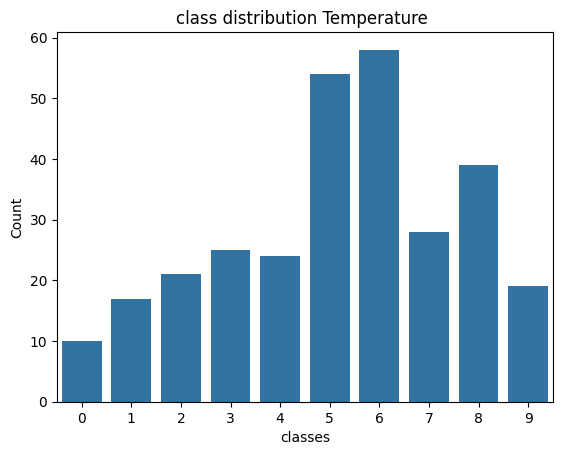

In [65]:
plot_classes(data , column_val)

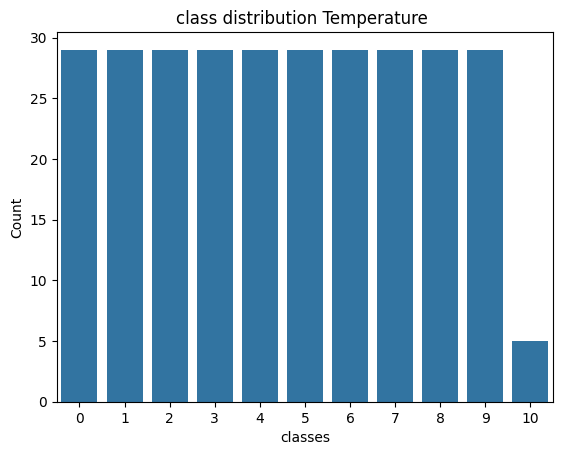

In [66]:
column_val = 'Temperature_E_F'
plot_classes(data , column_val)

# l’algorithme Apriori

In [67]:
grouped_data = data.groupby('Temperature_E_W').agg({
    'Temperature': list,
    'Humidity': list,
    'Rainfall': list,
    'Soil': list,
    'Crop': list,
    'Fertilizer': list
}).reset_index()

grouped_data.head(15)

,Temperature_E_W,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,0,"[20.28, 20.28, 20.05, 20.05, 20.28, 20.41, 20....","[82.12, 82.12, 80.35, 80.35, 82.89, 82.21, 81....","[191.95, 191.95, 208.58, 208.58, 241.97, 245.1...","[sandy, sandy, silty clay, silty clay, Clayey,...","[Coconut, Coconut, rice, rice, rice, rice, ric...","[DAP, Urea, MOP, Urea, MOP, MOP, MOP, MOP, Ure..."
1,1,"[21.33, 21.32, 21.14, 20.88, 20.82, 21.05, 21....","[80.47, 83.0, 80.34, 82.0, 84.13, 82.68, 82.68...","[185.5, 192.32, 198.67, 202.94, 230.22, 233.11...","[Clayey, Clayey, silty clay, Clayey, clay loam...","[rice, rice, rice, rice, rice, rice, rice, ric...","[DAP, Urea, Urea, Urea, Urea, Urea, DAP, Urea,..."
2,2,"[22.68, 22.68, 22.3, 22.3, 22.18, 22.18, 22.68...","[83.46, 83.46, 80.64, 80.64, 80.33, 80.33, 83....","[194.27, 194.27, 197.98, 197.98, 200.09, 200.0...","[silty clay, silty clay, silty clay, silty cla...","[rice, rice, rice, rice, Coconut, Coconut, ric...","[MOP, DAP, Urea, MOP, DAP, Urea, DAP, MOP, Goo..."
3,3,"[23.36, 23.36, 23.43, 23.43, 23.22, 23.22, 23....","[83.6, 83.6, 83.06, 83.06, 83.03, 83.03, 81.33...","[188.41, 188.41, 219.9, 219.9, 221.21, 221.21,...","[clay loam, clay loam, silty clay, silty clay,...","[rice, rice, rice, rice, rice, rice, rice, ric...","[Urea, MOP, MOP, DAP, Urea, MOP, DAP, Urea, DA..."
4,4,"[24.46, 24.46, 24.01, 24.01, 23.86, 23.86, 23....","[82.75, 82.75, 82.06, 82.06, 82.23, 82.23, 80....","[182.56, 182.56, 185.28, 185.28, 195.09, 195.0...","[coastal, coastal, laterite, laterite, alluvia...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[Urea, MOP, Urea, MOP, MOP, Urea, Urea, DAP, U..."
5,5,"[25.76, 25.76, 25.07, 25.07, 25.52, 25.85, 25....","[94.66, 94.66, 93.31, 93.31, 94.33, 90.93, 93....","[131.25, 131.25, 134.84, 134.84, 135.13, 147.8...","[alluvial, alluvial, alluvial, alluvial, coast...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[DAP, Urea, Urea, MOP, MOP, Good NPK, Good NPK..."
6,6,"[26.14, 26.11, 26.11, 26.19, 26.07, 26.07, 25....","[96.39, 91.52, 91.52, 96.97, 96.7, 96.7, 94.74...","[131.34, 134.13, 134.13, 135.42, 143.53, 143.5...","[coastal, sandy, sandy, sandy, sandy, sandy, c...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[MOP, Urea, DAP, DAP, Urea, MOP, MOP, Urea, Go..."
7,7,"[27.75, 27.19, 27.19, 27.46, 27.46, 27.01, 27....","[95.95, 92.2, 92.2, 92.91, 92.91, 96.46, 96.46...","[131.09, 141.32, 141.32, 142.14, 142.14, 144.3...","[laterite, laterite, laterite, coastal, coasta...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[Urea, DAP, Urea, MOP, Urea, DAP, MOP, Urea, M..."
8,8,"[28.57, 28.29, 28.88, 28.88, 28.83, 28.44, 28....","[95.68, 97.0, 95.11, 95.11, 92.17, 91.81, 90.7...","[134.84, 142.94, 145.06, 145.06, 145.42, 145.5...","[sandy, sandy, alluvial, alluvial, coastal, sa...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[DAP, Good NPK, Urea, DAP, Good NPK, Good NPK,..."
9,9,"[29.52, 29.29, 29.29, 29.7, 29.7, 29.13, 29.26...","[92.56, 91.96, 91.96, 95.21, 95.21, 91.31, 95....","[131.21, 132.15, 132.15, 148.3, 148.3, 157.24,...","[coastal, alluvial, alluvial, coastal, coastal...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[Good NPK, Urea, DAP, DAP, Urea, Good NPK, DAP..."


In [68]:
#generer les transactions
transactions = []
for row in grouped_data.index:
    transactions.extend(list(zip(*grouped_data.iloc[row, 1:])))
    
transactions[:]

[(20.28, 82.12, 191.95, 'sandy', 'Coconut', 'DAP'),
 (20.28, 82.12, 191.95, 'sandy', 'Coconut', 'Urea'),
 (20.05, 80.35, 208.58, 'silty clay', 'rice', 'MOP'),
 (20.05, 80.35, 208.58, 'silty clay', 'rice', 'Urea'),
 (20.28, 82.89, 241.97, 'Clayey', 'rice', 'MOP'),
 (20.41, 82.21, 245.15, 'Clayey', 'rice', 'MOP'),
 (20.13, 81.6, 262.72, 'Clayey', 'rice', 'MOP'),
 (20.08, 83.29, 263.64, 'Clayey', 'rice', 'MOP'),
 (20.08, 83.29, 263.64, 'Clayey', 'rice', 'Urea'),
 (20.27, 81.64, 270.44, 'silty clay', 'rice', 'MOP'),
 (21.33, 80.47, 185.5, 'Clayey', 'rice', 'DAP'),
 (21.32, 83.0, 192.32, 'Clayey', 'rice', 'Urea'),
 (21.14, 80.34, 198.67, 'silty clay', 'rice', 'Urea'),
 (20.88, 82.0, 202.94, 'Clayey', 'rice', 'Urea'),
 (20.82, 84.13, 230.22, 'clay loam', 'rice', 'Urea'),
 (21.05, 82.68, 233.11, 'silty clay', 'rice', 'Urea'),
 (21.05, 82.68, 233.11, 'silty clay', 'rice', 'DAP'),
 (20.78, 84.5, 240.08, 'silty clay', 'rice', 'Urea'),
 (20.78, 84.5, 240.08, 'silty clay', 'rice', 'MOP'),
 (21.45,

In [69]:
def frequency(transactions, itemset):
    count = 0
    for transaction in transactions:
        if itemset.issubset(transaction):
            count += 1
    return count

In [70]:
def generate_candidates(frequent_itemsets, k):
    candidates = set()
    for i in range(len(frequent_itemsets) - 1):
        for j in range(i + 1, len(frequent_itemsets)):
            # Joining step
            new_candidate = frequent_itemsets[i][0].union(frequent_itemsets[j][0])
            # Pruning step
            if len(new_candidate) == k:
                candidates.add(tuple(sorted(new_candidate)))
    return [set(candidate) for candidate in candidates]
    #return [item for item in candidates if len(item)==k]

In [71]:
def get_frequent_itemsets(transactions, min_support):
    # Get unique items
    unique_items = set(item for transaction in transactions for item in transaction)
    
    # List to save all itemsets that verify the min_support
    frequent_itemsets = []
    k = 1
    
    # First iteration candidates
    candidate_itemsets = [frozenset([item]) for item in unique_items]
    
    while True:
        # List to save each iteration's frequent itemsets with their support value
        frequent_itemsets_k = []
        
        # Calculate support
        for itemset in candidate_itemsets:
            support = frequency(transactions, itemset)
            
            if support >= min_support:
                frequent_itemsets_k.append((itemset, support))
                
        # No itemsets satisfy the min_support
        if not frequent_itemsets_k:
            break
        
        # Save the new itemsets
        frequent_itemsets.extend(frequent_itemsets_k)
        k += 1
        
        # Generate candidates for the next iteration
        candidate_itemsets = generate_candidates(frequent_itemsets_k, k)

    return frequent_itemsets

In [72]:
min_support = 7 # Set your desired minimum support 
frequent_itemsets = get_frequent_itemsets(transactions, min_support)
freq_itemsets = pd.DataFrame(frequent_itemsets, columns=['itemsets', 'support'])
freq_itemsets

,itemsets,support
0,(MOP),75
1,(clay loam),24
2,(coastal),50
3,(rice),143
4,(DAP),86
...,...,...
63,"{rice, Clayey, Urea}",18
64,"{coastal, Coconut, Urea}",19
65,"{MOP, coastal, Coconut}",12
66,"{rice, clay loam, Urea}",8


**Les règles d'association** sont utilisées dans l'exploration de données pour découvrir des relations fréquentes entre les variables d'un ensemble de données.

In [73]:
# Modify the association_rules format to store rules as sets
def generate_association_rules(frequent_itemsets):
    association_rules = []
    for itemset, support in frequent_itemsets:
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                consequent = itemset - set(antecedent)
                association_rules.append((set(antecedent), consequent, support))
    return association_rules

# Now, modify the code where you generate frequent itemsets
association_rules = generate_association_rules(frequent_itemsets)
association_rules_df = pd.DataFrame(association_rules, columns=['antecedent', 'consequent', 'support'])
association_rules_df

,antecedent,consequent,support
0,{MOP},{silty clay},16
1,{silty clay},{MOP},16
2,{MOP},{Clayey},16
3,{Clayey},{MOP},16
4,{rice},{DAP},47
...,...,...,...
185,{alluvial},"{MOP, Coconut}",8
186,{Coconut},"{MOP, alluvial}",8
187,"{MOP, alluvial}",{Coconut},8
188,"{MOP, Coconut}",{alluvial},8


**Confiance :** La confiance mesure la probabilité conditionnelle que, si un client achète un ensemble d'articles, il achètera également un autre article.

Confiance (A ⇒ B) = P(B/A) = support(A ∪ B) / support(A)

In [74]:
def calculate_confidence(transaction_data, antecedent, consequent):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transaction_data if antecedent.issubset(transaction) and consequent.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transaction_data if antecedent.issubset(transaction))

    # Calculer la confiance
    confidence = support_A_and_B / support_A
    return confidence

transactions = [set(transaction) for transaction in transactions]
association_rules_df['antecedent'] = association_rules_df['antecedent'].apply(set)
association_rules_df['consequent'] = association_rules_df['consequent'].apply(set)
min_confidence = 0.5 # Set your desired minimum confidence
# displaying values above min_confidence
association_rules_df['confidence'] = association_rules_df.apply(lambda row: calculate_confidence(transactions, row['antecedent'], row['consequent']), axis=1) 
association_rules_df = association_rules_df[association_rules_df['confidence'] >= min_confidence].reset_index(drop=True)
association_rules_df

,antecedent,consequent,support,confidence
0,{DAP},{rice},47,0.546512
1,{Clayey},{rice},54,1.000000
2,{silty clay},{rice},65,1.000000
3,{coastal},{Coconut},50,1.000000
4,{alluvial},{Coconut},26,1.000000
5,{MOP},{rice},38,0.506667
6,{laterite},{Coconut},28,1.000000
7,{sandy},{Coconut},48,1.000000
8,{Good NPK},{Coconut},23,0.696970
9,{clay loam},{rice},24,1.000000


LIFT :

In [75]:
#lift(A->B) = confidence(A=>B) / support(B)
def calculate_lift(left, right):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transactions if left.issubset(transaction) and right.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transactions if left.issubset(transaction))

    # Nombre de transactions contenant le conséquent
    support_B = sum(1 for transaction in transactions if right.issubset(transaction))

    # Calculer la confiance
    confidence = support_A_and_B / support_A

    # Calculer le lift
    lift = confidence / support_B
    return lift

association_rules_df['lift'] = association_rules_df.apply(lambda row: calculate_lift(row['antecedent'], row['consequent']), axis=1)
association_rules_df = association_rules_df[association_rules_df['confidence'] >= min_confidence].reset_index(drop=True)
association_rules_df

,antecedent,consequent,support,confidence,lift
0,{DAP},{rice},47,0.546512,0.003822
1,{Clayey},{rice},54,1.000000,0.006993
2,{silty clay},{rice},65,1.000000,0.006993
3,{coastal},{Coconut},50,1.000000,0.006579
4,{alluvial},{Coconut},26,1.000000,0.006579
5,{MOP},{rice},38,0.506667,0.003543
6,{laterite},{Coconut},28,1.000000,0.006579
7,{sandy},{Coconut},48,1.000000,0.006579
8,{Good NPK},{Coconut},23,0.696970,0.004585
9,{clay loam},{rice},24,1.000000,0.006993


In [76]:
def calculate_cosine(left, right):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transactions if left.issubset(transaction) and right.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transactions if left.issubset(transaction))

    # Nombre de transactions contenant le conséquent
    support_B = sum(1 for transaction in transactions if right.issubset(transaction))

    # Calculer le cosine
    cosine = support_A_and_B / math.sqrt(support_A * support_B)
    return cosine

association_rules_df['cosine'] = association_rules_df.apply(lambda row: calculate_cosine(row['antecedent'], row['consequent']), axis=1)
association_rules_df

,antecedent,consequent,support,confidence,lift,cosine
0,{DAP},{rice},47,0.546512,0.003822,0.423819
1,{Clayey},{rice},54,1.000000,0.006993,0.614510
2,{silty clay},{rice},65,1.000000,0.006993,0.674200
3,{coastal},{Coconut},50,1.000000,0.006579,0.573539
4,{alluvial},{Coconut},26,1.000000,0.006579,0.413585
5,{MOP},{rice},38,0.506667,0.003543,0.366931
6,{laterite},{Coconut},28,1.000000,0.006579,0.429198
7,{sandy},{Coconut},48,1.000000,0.006579,0.561951
8,{Good NPK},{Coconut},23,0.696970,0.004585,0.324750
9,{clay loam},{rice},24,1.000000,0.006993,0.409673


In [77]:
def calculate_jaccard(left, right):
    # Nombre de transactions contenant l'antécédent et le conséquent
    support_A_and_B = sum(1 for transaction in transactions if left.issubset(transaction) and right.issubset(transaction))

    # Nombre de transactions contenant l'antécédent
    support_A = sum(1 for transaction in transactions if left.issubset(transaction))

    # Nombre de transactions contenant le conséquent
    support_B = sum(1 for transaction in transactions if right.issubset(transaction))

    # Calculer le jaccard
    jaccard = support_A_and_B / (support_A + support_B - support_A_and_B)
    return jaccard

association_rules_df['jaccard'] = association_rules_df.apply(lambda row: calculate_jaccard(row['antecedent'], row['consequent']), axis=1)
association_rules_df

,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
1,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
2,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
3,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947
4,{alluvial},{Coconut},26,1.000000,0.006579,0.413585,0.171053
5,{MOP},{rice},38,0.506667,0.003543,0.366931,0.211111
6,{laterite},{Coconut},28,1.000000,0.006579,0.429198,0.184211
7,{sandy},{Coconut},48,1.000000,0.006579,0.561951,0.315789
8,{Good NPK},{Coconut},23,0.696970,0.004585,0.324750,0.141975
9,{clay loam},{rice},24,1.000000,0.006993,0.409673,0.167832


In [78]:
# exprimentation des differentes valeurs de min support et min confidence
min_support = [20 , 40 , 60]
min_confidence = [0.4 , 0.5 , 0.6]

# Iterate over min support values
for support in min_support:
    # Iterate over min confidence values
    for confidence in min_confidence:
        # Get frequent itemsets
        frequent_itemsets = get_frequent_itemsets(transactions, support)
        # Generate association rules
        association_rules = generate_association_rules(frequent_itemsets)
        # Convert association rules to a dataframe
        association_rules_df = pd.DataFrame(association_rules, columns=['antecedent','consequent', 'support'])
        # Calculate confidence
        association_rules_df['confidence'] = association_rules_df.apply(lambda row: calculate_confidence(transactions, row['antecedent'], row['consequent']), axis=1) 
        # Filter by confidence
        association_rules_df = association_rules_df[association_rules_df['confidence'] >= confidence].reset_index(drop=True)
        # Calculate lift
        association_rules_df['lift'] = association_rules_df.apply(lambda row: calculate_lift(row['antecedent'], row['consequent']), axis=1)
        # Filter by confidence
        association_rules_df = association_rules_df[association_rules_df['confidence'] >= confidence].reset_index(drop=True)
        # Calculate cosine
        association_rules_df['cosine'] = association_rules_df.apply(lambda row: calculate_cosine(row['antecedent'], row['consequent']), axis=1)
        # Calculate jaccard
        association_rules_df['jaccard'] = association_rules_df.apply(lambda row: calculate_jaccard(row['antecedent'], row['consequent']), axis=1)
        # Print results using data frame 
        print(f"Support: {support}, Confidence: {confidence}")
        display(association_rules_df.head())

Support: 20, Confidence: 0.4


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
1,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
2,{rice},{silty clay},65,0.454545,0.006993,0.674200,0.454545
3,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
4,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947


Support: 20, Confidence: 0.5


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
1,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
2,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
3,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947
4,{alluvial},{Coconut},26,1.000000,0.006579,0.413585,0.171053


Support: 20, Confidence: 0.6


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{Clayey},{rice},54,1.0,0.006993,0.614510,0.377622
1,{silty clay},{rice},65,1.0,0.006993,0.674200,0.454545
2,{coastal},{Coconut},50,1.0,0.006579,0.573539,0.328947
3,{alluvial},{Coconut},26,1.0,0.006579,0.413585,0.171053
4,{laterite},{Coconut},28,1.0,0.006579,0.429198,0.184211


Support: 40, Confidence: 0.4


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
1,{rice},{silty clay},65,0.454545,0.006993,0.674200,0.454545
2,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
3,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
4,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947


Support: 40, Confidence: 0.5


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{Clayey},{rice},54,1.000000,0.006993,0.614510,0.377622
1,{silty clay},{rice},65,1.000000,0.006993,0.674200,0.454545
2,{DAP},{rice},47,0.546512,0.003822,0.423819,0.258242
3,{coastal},{Coconut},50,1.000000,0.006579,0.573539,0.328947
4,{sandy},{Coconut},48,1.000000,0.006579,0.561951,0.315789


Support: 40, Confidence: 0.6


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{Clayey},{rice},54,1.0,0.006993,0.614510,0.377622
1,{silty clay},{rice},65,1.0,0.006993,0.674200,0.454545
2,{coastal},{Coconut},50,1.0,0.006579,0.573539,0.328947
3,{sandy},{Coconut},48,1.0,0.006579,0.561951,0.315789


Support: 60, Confidence: 0.4


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{rice},{silty clay},65,0.454545,0.006993,0.6742,0.454545
1,{silty clay},{rice},65,1.000000,0.006993,0.6742,0.454545


Support: 60, Confidence: 0.5


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{silty clay},{rice},65,1.0,0.006993,0.6742,0.454545


Support: 60, Confidence: 0.6


,antecedent,consequent,support,confidence,lift,cosine,jaccard
0,{silty clay},{rice},65,1.0,0.006993,0.6742,0.454545


In [79]:
# def Apriori(dataset , min_support, min_confidence):
#     grouped_data = dataset.groupby('Temperature_E_W').agg({
#         'Temperature': list,
#         'Humidity': list,
#         'Rainfall': list,
#         'Soil': list,
#         'Crop': list,
#         'Fertilizer': list
#     }).reset_index()
#     #generer les transactions
#     transactions = []
#     for row in grouped_data.index:
#         transactions.extend(list(zip(*grouped_data.iloc[row, 1:])))
        

#     transactions = [set(transaction) for transaction in transactions]
#     association_rules_df['antecedent'] = association_rules_df['antecedent'].apply(set)
#     association_rules_df['consequent'] = association_rules_df['consequent'].apply(set)

#     association_rules_df['confidence'] = association_rules_df.apply(lambda row: calculate_confidence(transactions, row['antecedent'], row['consequent']), axis=1) 
#     association_rules_df = association_rules_df[association_rules_df['confidence'] >= min_confidence].reset_index(drop=True)
    
#     frequent_itemsets = get_frequent_itemsets(transactions, min_support) 
#     # association_rules = generate_association_rules(frequent_itemsets)
#     # # Convert association rules to a dataframe
#     association_rules_df = pd.DataFrame(association_rules, columns=['antecedent','consequent', 'support'])
#     # Calculate confidence
#     association_rules_df['confidence'] = association_rules_df.apply(lambda row: calculate_confidence(transactions, row['antecedent'], row['consequent']), axis=1) 
#     # Filter by confidence
#     association_rules_df = association_rules_df[association_rules_df['confidence'] >= confidence].reset_index(drop=True)
#     # Calculate lift
#     association_rules_df['lift'] = association_rules_df.apply(lambda row: calculate_lift(row['antecedent'], row['consequent']), axis=1)
#     # Filter by confidence
#     association_rules_df = association_rules_df[association_rules_df['confidence'] >= confidence].reset_index(drop=True)
#     # Calculate cosine
#     association_rules_df['cosine'] = association_rules_df.apply(lambda row: calculate_cosine(row['antecedent'], row['consequent']), axis=1)
#     # Calculate jaccard
#     association_rules_df['jaccard'] = association_rules_df.apply(lambda row: calculate_jaccard(row['antecedent'], row['consequent']), axis=1)
#     return frequent_itemsets

# #test de la fonction apriori 
# min_support = 20 # Set your desired minimum support
# min_confidence = 0.4 # Set your desired minimum confidence
# frequent_itemsets = Apriori(data , min_support , min_confidence)
# freq_itemsets = pd.DataFrame(frequent_itemsets, columns=['itemsets', 'support', 'confidence', 'lift', 'cosine', 'jaccard'])
# freq_itemsets

UnboundLocalError: cannot access local variable 'association_rules_df' where it is not associated with a value